In [149]:
import sys
import math
del sys.modules['feature']
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import feature as ft

In [123]:
#df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")
#df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df = df[(df['Timestamp'].between(160, 165) == True)].reset_index()
df['Gaze Y'] = df['Gaze Y'].fillna(0)
df['Gaze X'] = df['Gaze X'].fillna(0)
df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
df['Lost Track'] = df['Lost Track'].notna().astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)


# Generiert Geschwindigkeit
df_ges = ft.ges(df)
df = pd.concat([df,df_ges],axis=1)

### Filter
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
#df_new = df_new.loc[(df_new["dx"] >= 10) & (df_new["dx"] >= -10) == True]
#df_new = df_new.loc[(df_new["dy"] >= 20 * df_new["dx"]) & (df_new["dy"] > 0) == False]
#df_new = df_new.loc[(df_new["vx"] < -10) & (df_new["vx"] > 10) == False]
#df_new = df_new.loc[(df_new["vy"] <= 2500) & (df_new['vx'] >= 100) == True]
df = df[(df["Gaze Y"] <= 1030) == True].reset_index().drop(['level_0'], axis=1)
df['Fixation'] = ft.fix(df)
df = df.loc[(df['v'] == 0) & (df['Fixation'] == 0) == False].reset_index().drop(['level_0'], axis=1)
df

# Sakkaden
df_sacc = ft.sac(df)
df = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_sacc], axis=1, )

# Lost Track Dauer
df_ltt = ft.lost_t(df)
df  = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_ltt], axis=1, )

df.drop(df.tail(1).index,inplace=True)
df

,index,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation,Saccades,Saccade Duration,Lost Track Dauer
0,3611,3611,160.023674,238,389,0,TrackingConfidence.HIGH,160023,99.0,-19.0,100.806746,2131.098899,408.998779,2169.991363,1.381183,1.0,0.0,0.0,0
1,3612,3612,160.070128,337,370,0,TrackingConfidence.HIGH,160070,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0
2,3613,3613,160.100513,337,370,0,TrackingConfidence.HIGH,160100,487.0,56.0,490.209139,10506.687077,1208.161142,10575.922025,1.456309,1.0,0.0,0.0,0
3,3614,3614,160.146865,824,426,0,TrackingConfidence.HIGH,160146,2.0,-13.0,13.152946,64.871573,421.665226,426.626164,0.152649,0.0,1.0,31.0,0
4,3615,3615,160.177695,826,413,0,TrackingConfidence.HIGH,160177,-4.0,-3.0,5.000000,-85.747223,64.310418,107.184029,-0.927295,2.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3722,3722,164.775590,798,494,0,TrackingConfidence.HIGH,164775,0.0,3.0,3.000000,0.000000,99.038276,99.038276,0.000000,8.0,0.0,0.0,0
94,3723,3723,164.805882,798,497,0,TrackingConfidence.HIGH,164805,4.0,2.0,4.472136,85.467224,42.733612,95.555261,1.107149,8.0,0.0,0.0,0
95,3724,3724,164.852683,802,499,0,TrackingConfidence.HIGH,164852,-18.0,-12.0,21.633308,-390.369555,260.246370,469.165816,-0.982794,8.0,0.0,0.0,0
96,3725,3725,164.898793,784,487,0,TrackingConfidence.HIGH,164898,-3.0,31.0,31.144823,-93.799429,969.260766,973.788871,-0.096474,8.0,0.0,0.0,0


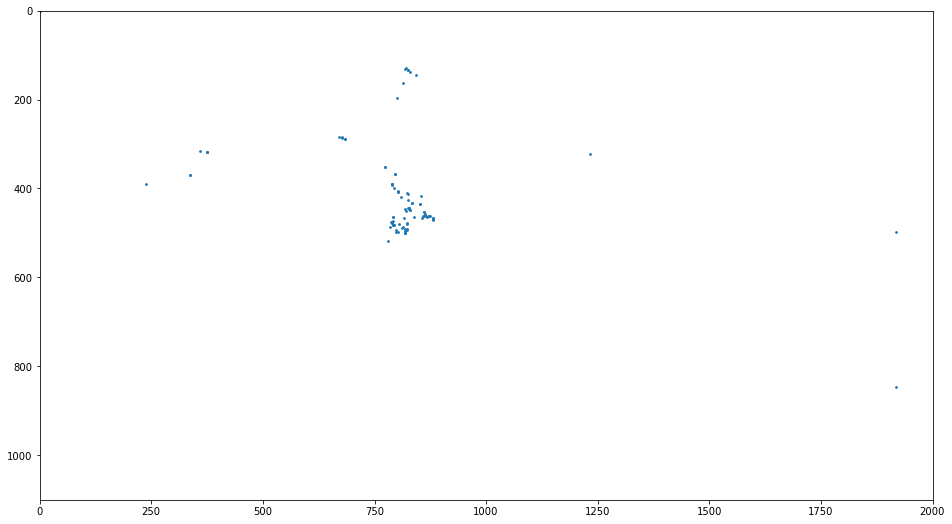

In [69]:
#df = df[(df['Timestamp'].between(30,40) == True)]
x = df["Gaze X"]
y = df["Gaze Y"]
#z = df2['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3)
plt.show()

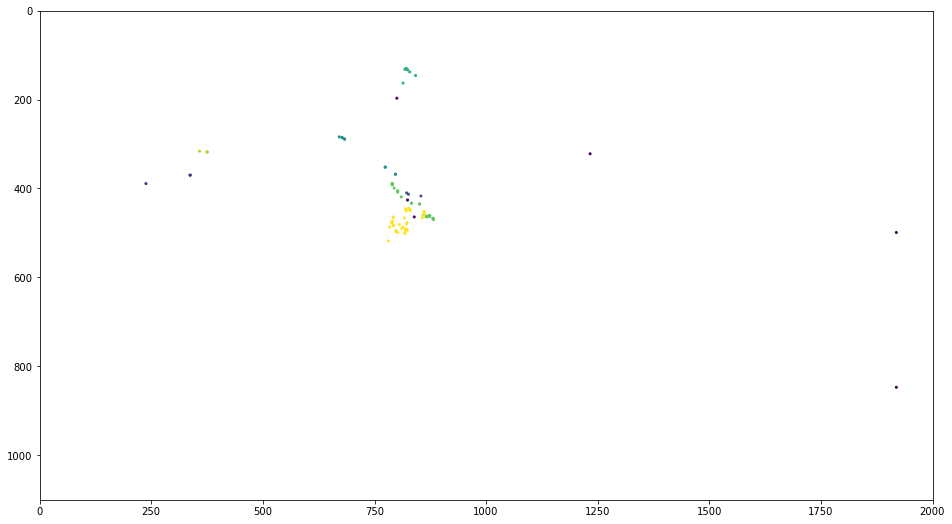

In [70]:
#df_filter = df_new[(df_new['Timestamp'].between(160,165) == True)]
#df_filter = df_filter[(df_new["Fixation"] == 0) == True]
x = df["Gaze X"]
y = df["Gaze Y"]
z = df['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 4, c=z)
plt.show()

In [224]:
df_final = pd.read_csv('feature.csv')
df_final.drop(['Unnamed: 0'], axis=1)

,Cliplänge in Sekunden,Anzahl Sakkaden,Gesamt Dauer Sakkaden,Anzahl Lost Tracks,Dauer Lost Tracks,Anzahl Fixationen,Gesamt Dauer Fixationen,Name
0,5.0,2.0,58.0,0.0,0.0,4.0,4.942,Vanessa_22.06.csv
1,5.0,5.0,187.0,0.0,0.0,7.0,4.813,Ole_20.06.csv
2,5.0,4.0,757.0,1.0,633.0,8.0,3.610,Merle_22.06.csv
3,5.0,28.0,1035.0,0.0,0.0,23.0,3.965,Nils_21.06.csv
4,5.0,6.0,185.0,0.0,0.0,6.0,4.815,Annika_20.06.csv
5,5.0,5.0,261.0,0.0,0.0,6.0,4.739,Robin_22.06.csv
6,5.0,7.0,217.0,0.0,0.0,8.0,4.783,Fiona_21.06.csv
7,5.0,12.0,1510.0,1.0,1087.0,10.0,2.403,Neele_20.06.csv
8,5.0,19.0,832.0,0.0,0.0,17.0,4.168,Jannis_16_06.csv
